In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 225.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7009 - accuracy: 0.7689 - val_loss: 0.5104 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4787 - accuracy: 0.8339 - val_loss: 0.4493 - val_accuracy: 0.8492
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4348 - accuracy: 0.8478 - val_loss: 0.4265 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4075 - accuracy: 0.8578 - val_loss: 0.3912 - val_accuracy: 0.8702
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3860 - accuracy: 0.8639 - val_loss: 0.3875 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8696 - val_loss: 0.3732 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3592 - accuracy: 0.8725 - val_loss: 0.3894 - val_accuracy:

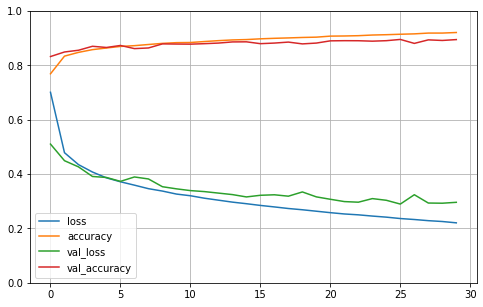

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 51.6404 - accuracy: 0.8637


[51.64036560058594, 0.8636999726295471]